### Linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Choose features

In [5]:
x_label = data['sqft_living'].values
y_label = data['price'].values

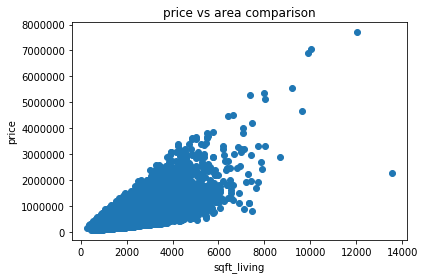

In [6]:
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('price vs area comparison')
plt.scatter(x_label,y_label)

##### Import Libraries

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Choose Model

In [8]:
clf=LinearRegression()

##### Split train and test data

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_label,y_label, test_size=0.1, random_state=2)
print(type(x_train))

<class 'numpy.ndarray'>


##### Fit model for training data

In [10]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Accuracy 

In [11]:
clf.score(x_train,y_train)

0.4893743993810999

##### Predict for a certain sample

In [12]:
clf.predict(2000)

array([[517440.04982394]])

##### RMSE Score

In [13]:
from sklearn.metrics import mean_squared_error

y_pred = clf.predict(x_test)
print("\n Root Mean Square Value :", end="")
print(mean_squared_error(y_test,y_pred))


 Root Mean Square Value :70031883269.05084


##### Variance Score

In [14]:
from sklearn.metrics import r2_score
print("\n Variance score :", end="")
print(r2_score(y_test,y_pred))


 Variance score :0.5207410788722813


##### Coefficients

In [15]:
clf.coef_

array([[279.21470903]])

##### Plot the line

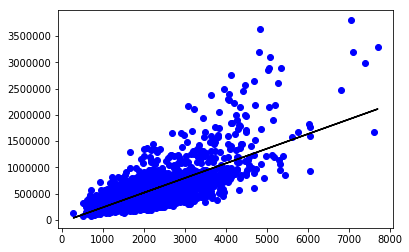

In [16]:
y_pred=clf.predict(x_test.reshape(-1,1))
plt.scatter(x_test,y_test, color ='blue')
plt.plot(x_test,y_pred.reshape(-1,1),color='black')

### Sample Example by considering more features

In [17]:
data = pd.read_csv("kc_house_data.csv")

##### The predictor should always be a single value

In [18]:
mld=LinearRegression()
y_label=data['price']   

##### One hot encoding

In [19]:
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates

##### Drop the predicted feature and id

In [20]:
x_label=data.drop(['id','price'],axis=1)

##### Train and Test data split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_label,y_label, test_size=0.1, random_state=2)

##### Fit the model

In [22]:
mld.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Accuracy Score

In [23]:
mld.score(x_test,y_test)

0.7320342760357399

##### RMSE Score

In [24]:
from sklearn.metrics import mean_squared_error

y_pred = mld.predict(x_test)
print("\n Root Mean Square Value :", end="")
print(mean_squared_error(y_test,y_pred))


 Root Mean Square Value :39156588377.351746


##### Variance score

In [25]:
from sklearn.metrics import r2_score

print("\n Variance :", end="")
print(r2_score(y_test,y_pred))


 Variance :0.7320342760357399
